In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Direct, $b_{s}=b$

In [2]:
def du2_dphi2(a, b, u):
    # 计算括号内的各项之和
    term1 = 2 * a**5 * u**4 * (5 * u + 2)
    term2 = 3 * a**4 * b * u**3 * (-10 * u**2 + u + 1)
    term3 = 2 * a**3 * u**2 * (
        15 * b**2 * u**3
        - 3 * (3 * b**2 + 2) * u**2
        - u
        + 1
    )
    term4 = a**2 * b * u * (
        -10 * b**2 * u**4
        + (11 * b**2 + 36) * u**3
        - 3 * (b**2 + 4) * u**2
        - 3 * u
        + 3
    )
    term5 = -2 * a * (
        3 * b**2 * (6 * u**2 - 5 * u + 1) * u**2
        + 1
    )
    term6 = b**3 * (1 - 2 * u)**2 * u * (3 * u - 1)
    
    # 括号内总和
    inner_sum = term1 + term2 + term3 + term4 + term5 + term6
    
    # 最终结果
    result = (a**2 * u**2 - 2 * u + 1) * inner_sum * (-1)/(b*(2*u-1)-2*a*u)**3
    return result

In [3]:
def solve_orbit(phi, y, a, b):
    u, u_prime = y[0: 2]
    
    du_dphi = u_prime
    du2dphi2 = du2_dphi2(a, b, u)

    return [du_dphi, du2dphi2]

def ini_condition(u, a, b):
    A_u = (1-2*u+a**2*u**2)**2/(1-2*u*(1-a/b))**2
    B_u = 2*u**3*(1-a/b)**2-u**2*(1-a**2/b**2)+1/b**2

    return [u, np.sqrt(A_u*B_u)]

In [4]:
a = [0, 0.05, 0.2, 0.5, 0.9]
b = 15
r_ini = 50
u_ini = 1/r_ini
phi_end = [np.pi/1.02, np.pi/1.02, np.pi/1.02, np.pi/1.02, np.pi/1.02]
phi_rng = [[np.arcsin(b/r_ini), phi_end[i]] for i in range(len(a))]
y_ini = [ini_condition(u_ini, a[i], b) for i in range(len(a))]

In [5]:
x_list = []
y_list = []

In [6]:
for i in range(len(a)):
    sol = solve_ivp(solve_orbit, phi_rng[i], y_ini[i], args=(a[i], b), dense_output=True, atol=1e-9, rtol=1e-7)
    phi_list = np.linspace(phi_rng[i][0], phi_rng[i][-1], 10*len(sol.t))
    u_list = sol.sol(phi_list)[0]
    r_list = 1/u_list
    x_list.append(r_list*np.cos(phi_list))
    y_list.append(r_list*np.sin(phi_list))

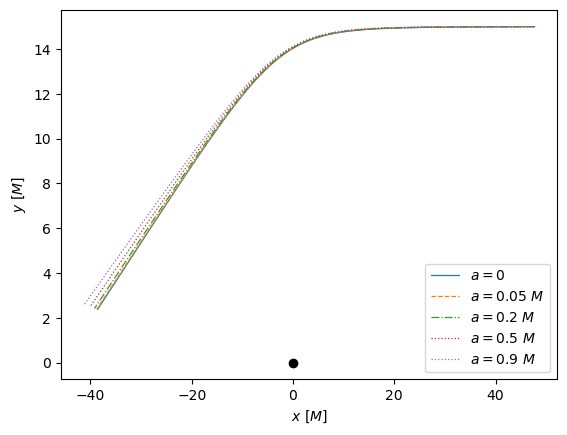

In [7]:
plt.plot(x_list[0], y_list[0], lw=0.9, label=r'$a={}$'.format(a[0]))
plt.plot(x_list[1], y_list[1], lw=0.9, linestyle = '--', label=r'$a={}\ M$'.format(a[1]))
plt.plot(x_list[2], y_list[2], lw=0.9, linestyle = '-.', label=r'$a={}\ M$'.format(a[2]))
plt.plot(x_list[3], y_list[3], lw=0.9, linestyle = ':', label=r'$a={}\ M$'.format(a[3]))
plt.plot(x_list[4], y_list[4], lw=0.9, linestyle = ':', label=r'$a={}\ M$'.format(a[4]))

plt.scatter(0, 0, color='black')
plt.legend(loc='lower right')
#plt.xlim(-10, 25)
#plt.ylim(-5, 10)
plt.xlabel(r'$x\ [M]$')
plt.ylabel(r'$y\ [M]$')
plt.show()

Retro, $b_{s}=-b$

In [8]:
def du2_dphi2a(a, b, u):
    # 计算分子中的各个项
    term1 = 2 * a**5 * u**4 * (5 * u + 2)
    term2 = 3 * a**4 * b * u**3 * (10 * u**2 - u - 1)
    term3 = 2 * a**3 * u**2 * (
        15 * b**2 * u**3
        - 3 * (3 * b**2 + 2) * u**2
        - u
        + 1
    )
    term4 = a**2 * b * u * (
        10 * b**2 * u**4
        - (11 * b**2 + 36) * u**3
        + 3 * (b**2 + 4) * u**2
        + 3 * u
        - 3
    )
    term5 = -2 * a * (
        3 * b**2 * (6 * u**2 - 5 * u + 1) * u**2
        + 1
    )
    term6 = -b**3 * (1 - 2 * u)**2 * u * (3 * u - 1)
    
    # 分子部分的总和
    inner_sum = term1 + term2 + term3 + term4 + term5 + term6
    numerator = 2 * (a**2 * u**2 - 2 * u + 1) * inner_sum
    
    # 分母部分
    denominator = (2 * a * u + b * (2 * u - 1))**3
    
    # 最终结果
    return (1/2)*numerator / denominator

In [9]:
def solve_orbita(phi, y, a, b):
    u, u_prime = y[0: 2]
    
    du_dphi = u_prime
    du2dphi2 = du2_dphi2a(a, b, u)

    return [du_dphi, du2dphi2]

def ini_conditiona(u, a, b):
    A_u = (1-2*u+a**2*u**2)**2/(1-2*u*(1+a/b))**2
    B_u = 2*u**3*(1+a/b)**2-u**2*(1-a**2/b**2)+1/b**2

    return [u, np.sqrt(A_u*B_u)]

In [10]:
phi_enda = [np.pi/1.02, np.pi/1.02, np.pi/1.02, np.pi/1.02, np.pi/1.02]
phi_rnga = [[np.arcsin(b/r_ini), phi_enda[i]] for i in range(len(a))]
y_inia = [ini_conditiona(u_ini, a[i], b) for i in range(len(a))]

In [11]:
x_lista = []
y_lista = []

In [12]:
for i in range(len(a)):
    sola = solve_ivp(solve_orbita, phi_rnga[i], y_inia[i], args=(a[i], b), dense_output=True, atol=1e-9, rtol=1e-7)
    phi_lista = np.linspace(phi_rnga[i][0], phi_rnga[i][-1], 10*len(sola.t))
    u_lista = sola.sol(phi_lista)[0]
    r_lista = 1/u_lista
    x_lista.append(r_lista*np.cos(phi_lista))
    y_lista.append(-r_lista*np.sin(phi_lista))

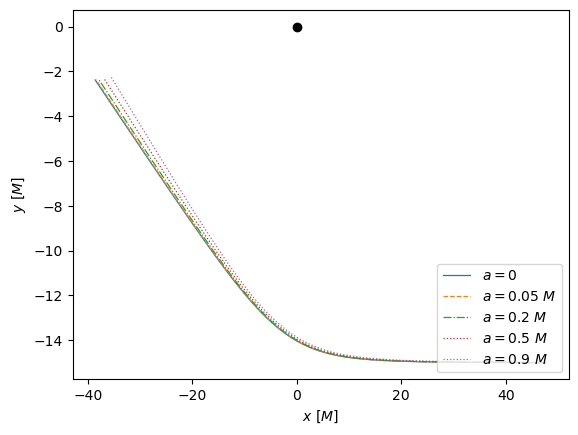

In [13]:
plt.plot(x_lista[0], y_lista[0], lw=0.9, label=r'$a={}$'.format(a[0]))
plt.plot(x_lista[1], y_lista[1], lw=0.9, linestyle = '--', label=r'$a={}\ M$'.format(a[1]))
plt.plot(x_lista[2], y_lista[2], lw=0.9, linestyle = '-.', label=r'$a={}\ M$'.format(a[2]))
plt.plot(x_lista[3], y_lista[3], lw=0.9, linestyle = ':', label=r'$a={}\ M$'.format(a[3]))
plt.plot(x_lista[4], y_lista[4], lw=0.9, linestyle = ':', label=r'$a={}\ M$'.format(a[4]))

plt.scatter(0, 0, color='black')
plt.legend(loc='lower right')
#plt.xlim(-10, 25)
#plt.ylim(-5, 10)
plt.xlabel(r'$x\ [M]$')
plt.ylabel(r'$y\ [M]$')
plt.show()

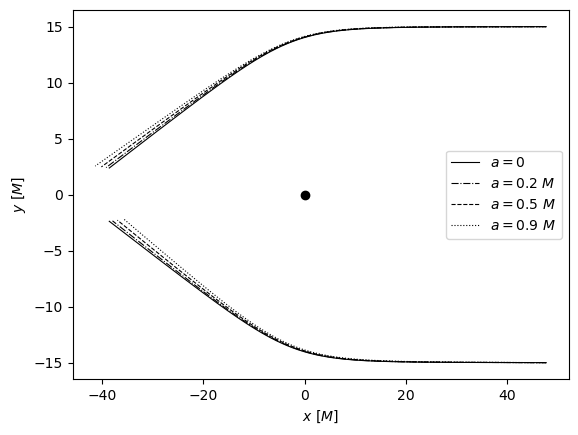

In [14]:
#Direct
plt.plot(x_list[0], y_list[0], lw=0.8, color='black')
plt.plot(x_list[2], y_list[2], lw=0.8, linestyle = '-.', color='black')
plt.plot(x_list[3], y_list[3], lw=0.8, linestyle = '--', color='black')
plt.plot(x_list[4], y_list[4], lw=0.8, linestyle = ':', color='black')

#Retro
plt.plot(x_lista[0], y_lista[0], lw=0.8, label=r'$a={}$'.format(a[0]), color='black')
plt.plot(x_lista[2], y_lista[2], lw=0.8, linestyle = '-.', label=r'$a={}\ M$'.format(a[2]), color='black')
plt.plot(x_lista[3], y_lista[3], lw=0.8, linestyle = '--', label=r'$a={}\ M$'.format(a[3]), color='black')
plt.plot(x_lista[4], y_lista[4], lw=0.8, linestyle = ':', label=r'$a={}\ M$'.format(a[4]), color='black')

plt.scatter(0, 0, color='black')
plt.legend()
#plt.xlim(-30, 25)
#plt.ylim(-5, 10)
plt.xlabel(r'$x\ [M]$')
plt.ylabel(r'$y\ [M]$')
plt.show()